In [1]:
import os
import copy
import glob

import fitz
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox

import heartpy as hp
from scipy import signal

# Data

In [2]:
data = np.load('data_2023' + os.sep + 'rawData.npy')
labels = np.load('data_2023' + os.sep + 'rawLabels.npy')

print(data.shape)

# patient groups
subjects = np.load('data_2023' + os.sep + 'rawSubjects.npy')
print(subjects.shape)

(4153, 12, 1238)
(4153,)


In [3]:
groups = np.array(subjects)
data.shape, labels.shape, groups.shape

((4153, 12, 1238), (4153,), (4153,))

# Results

In [4]:
from codeISBI import singleTangentSpace, multipleTangentSpace

### Single Tangent Space

In [ ]:
allPredictions, allTestLabels = singleTangentSpace(data, labels, groups)

### Multiple Tangent Space

In [ ]:
allPredictions, allTestLabels = multipleTangentSpace(data, labels, groups)

### t-SNE Embeddings

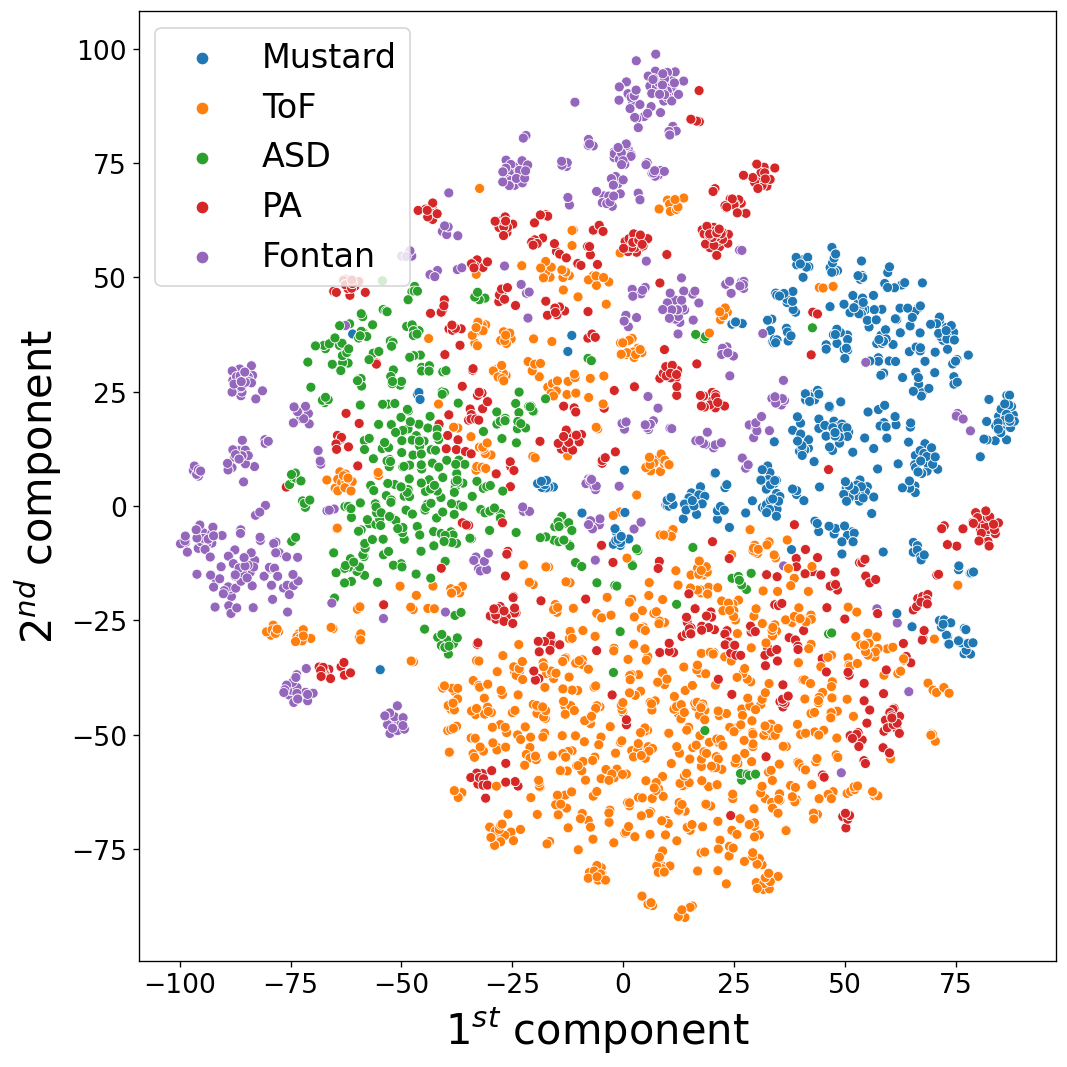

In [206]:
# Fig. 3a: t-SNE on tangent space
plt.figure(figsize=(9,9))
sns.scatterplot(
    x=tsne30[:,0], y=tsne30[:,1],
    hue=labels_,
    palette='tab10',
)

plt.xlabel("$1^{st}$ component", fontsize=25)
plt.ylabel("$2^{nd}$ component", fontsize=25)

plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)

plt.legend(fontsize=20, loc='upper left')

plt.tight_layout()
fig.canvas.draw()


plt.savefig('test.png', transparent=True, bbox_inches="tight", pad_inches=0.01)
plt.show()

/var/folders/nt/vht76wwj7w158157jsn_5s5r0000gn/T/ipykernel_50898/684430784.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels([''])


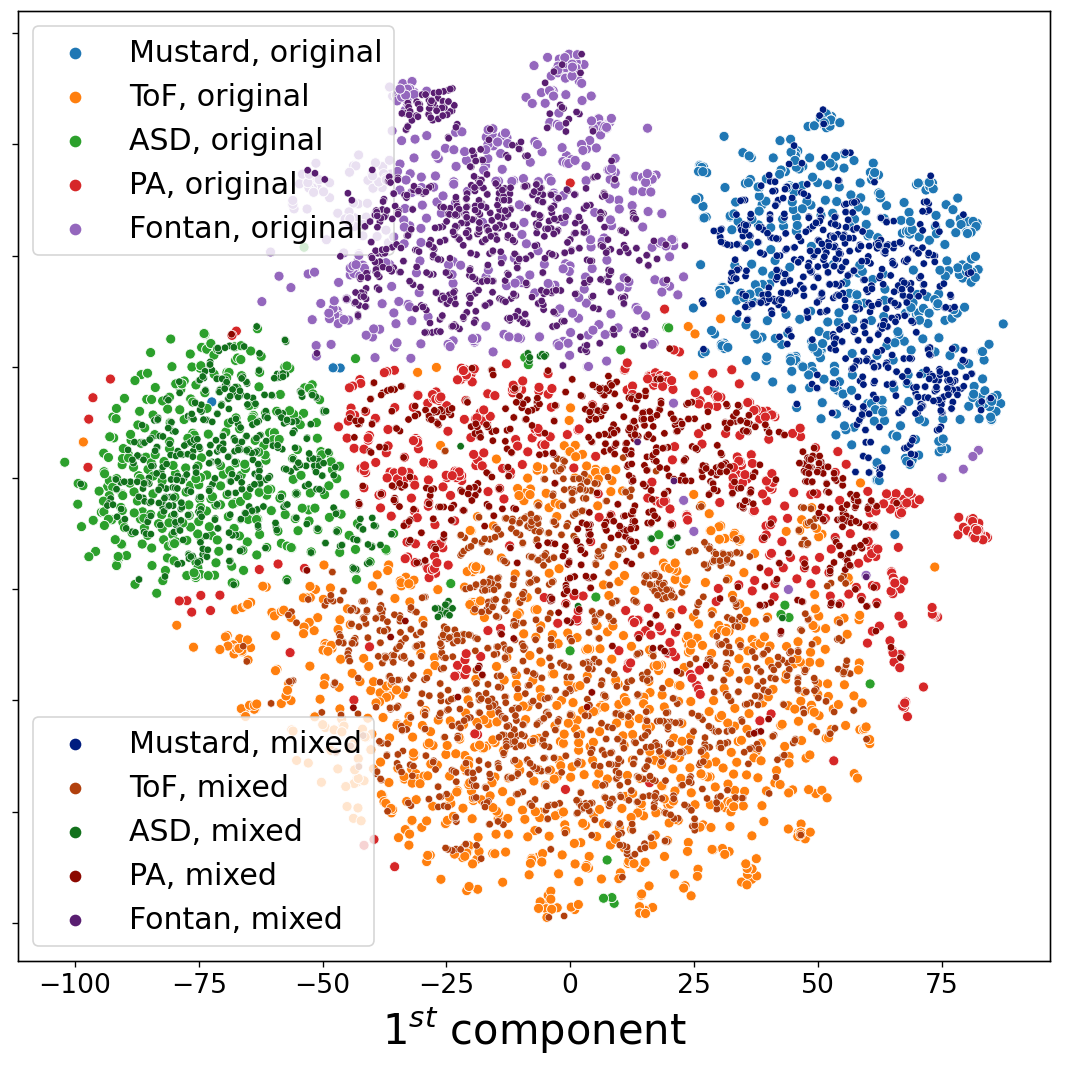

In [223]:
# Fig. 3b: t-SNE with covarinace augmentations on tangent space
fig, ax = plt.subplots(figsize=(9,9))

sns.scatterplot(
    x=tsne30_cov1[:,0], y=tsne30_cov1[:,1],
    hue=data_all_labels1,
    palette='tab10',
)

ax2 = ax.twinx()
sns.scatterplot(
    x=tsne30_cov2[:,0], y=tsne30_cov2[:,1],
    hue=data_all_labels2,
    palette='dark',
    s=20
)
ax2.get_yaxis().set_visible(False)

ax.legend(fontsize=18,loc=2)
ax2.legend(fontsize=18,loc=3)

ax.set_xlabel("$1^{st}$ component", fontsize=25)

ax.tick_params(axis='x', labelsize=16)
ax.yaxis.set_ticklabels([''])

plt.tight_layout()
plt.show()

### AUC scores

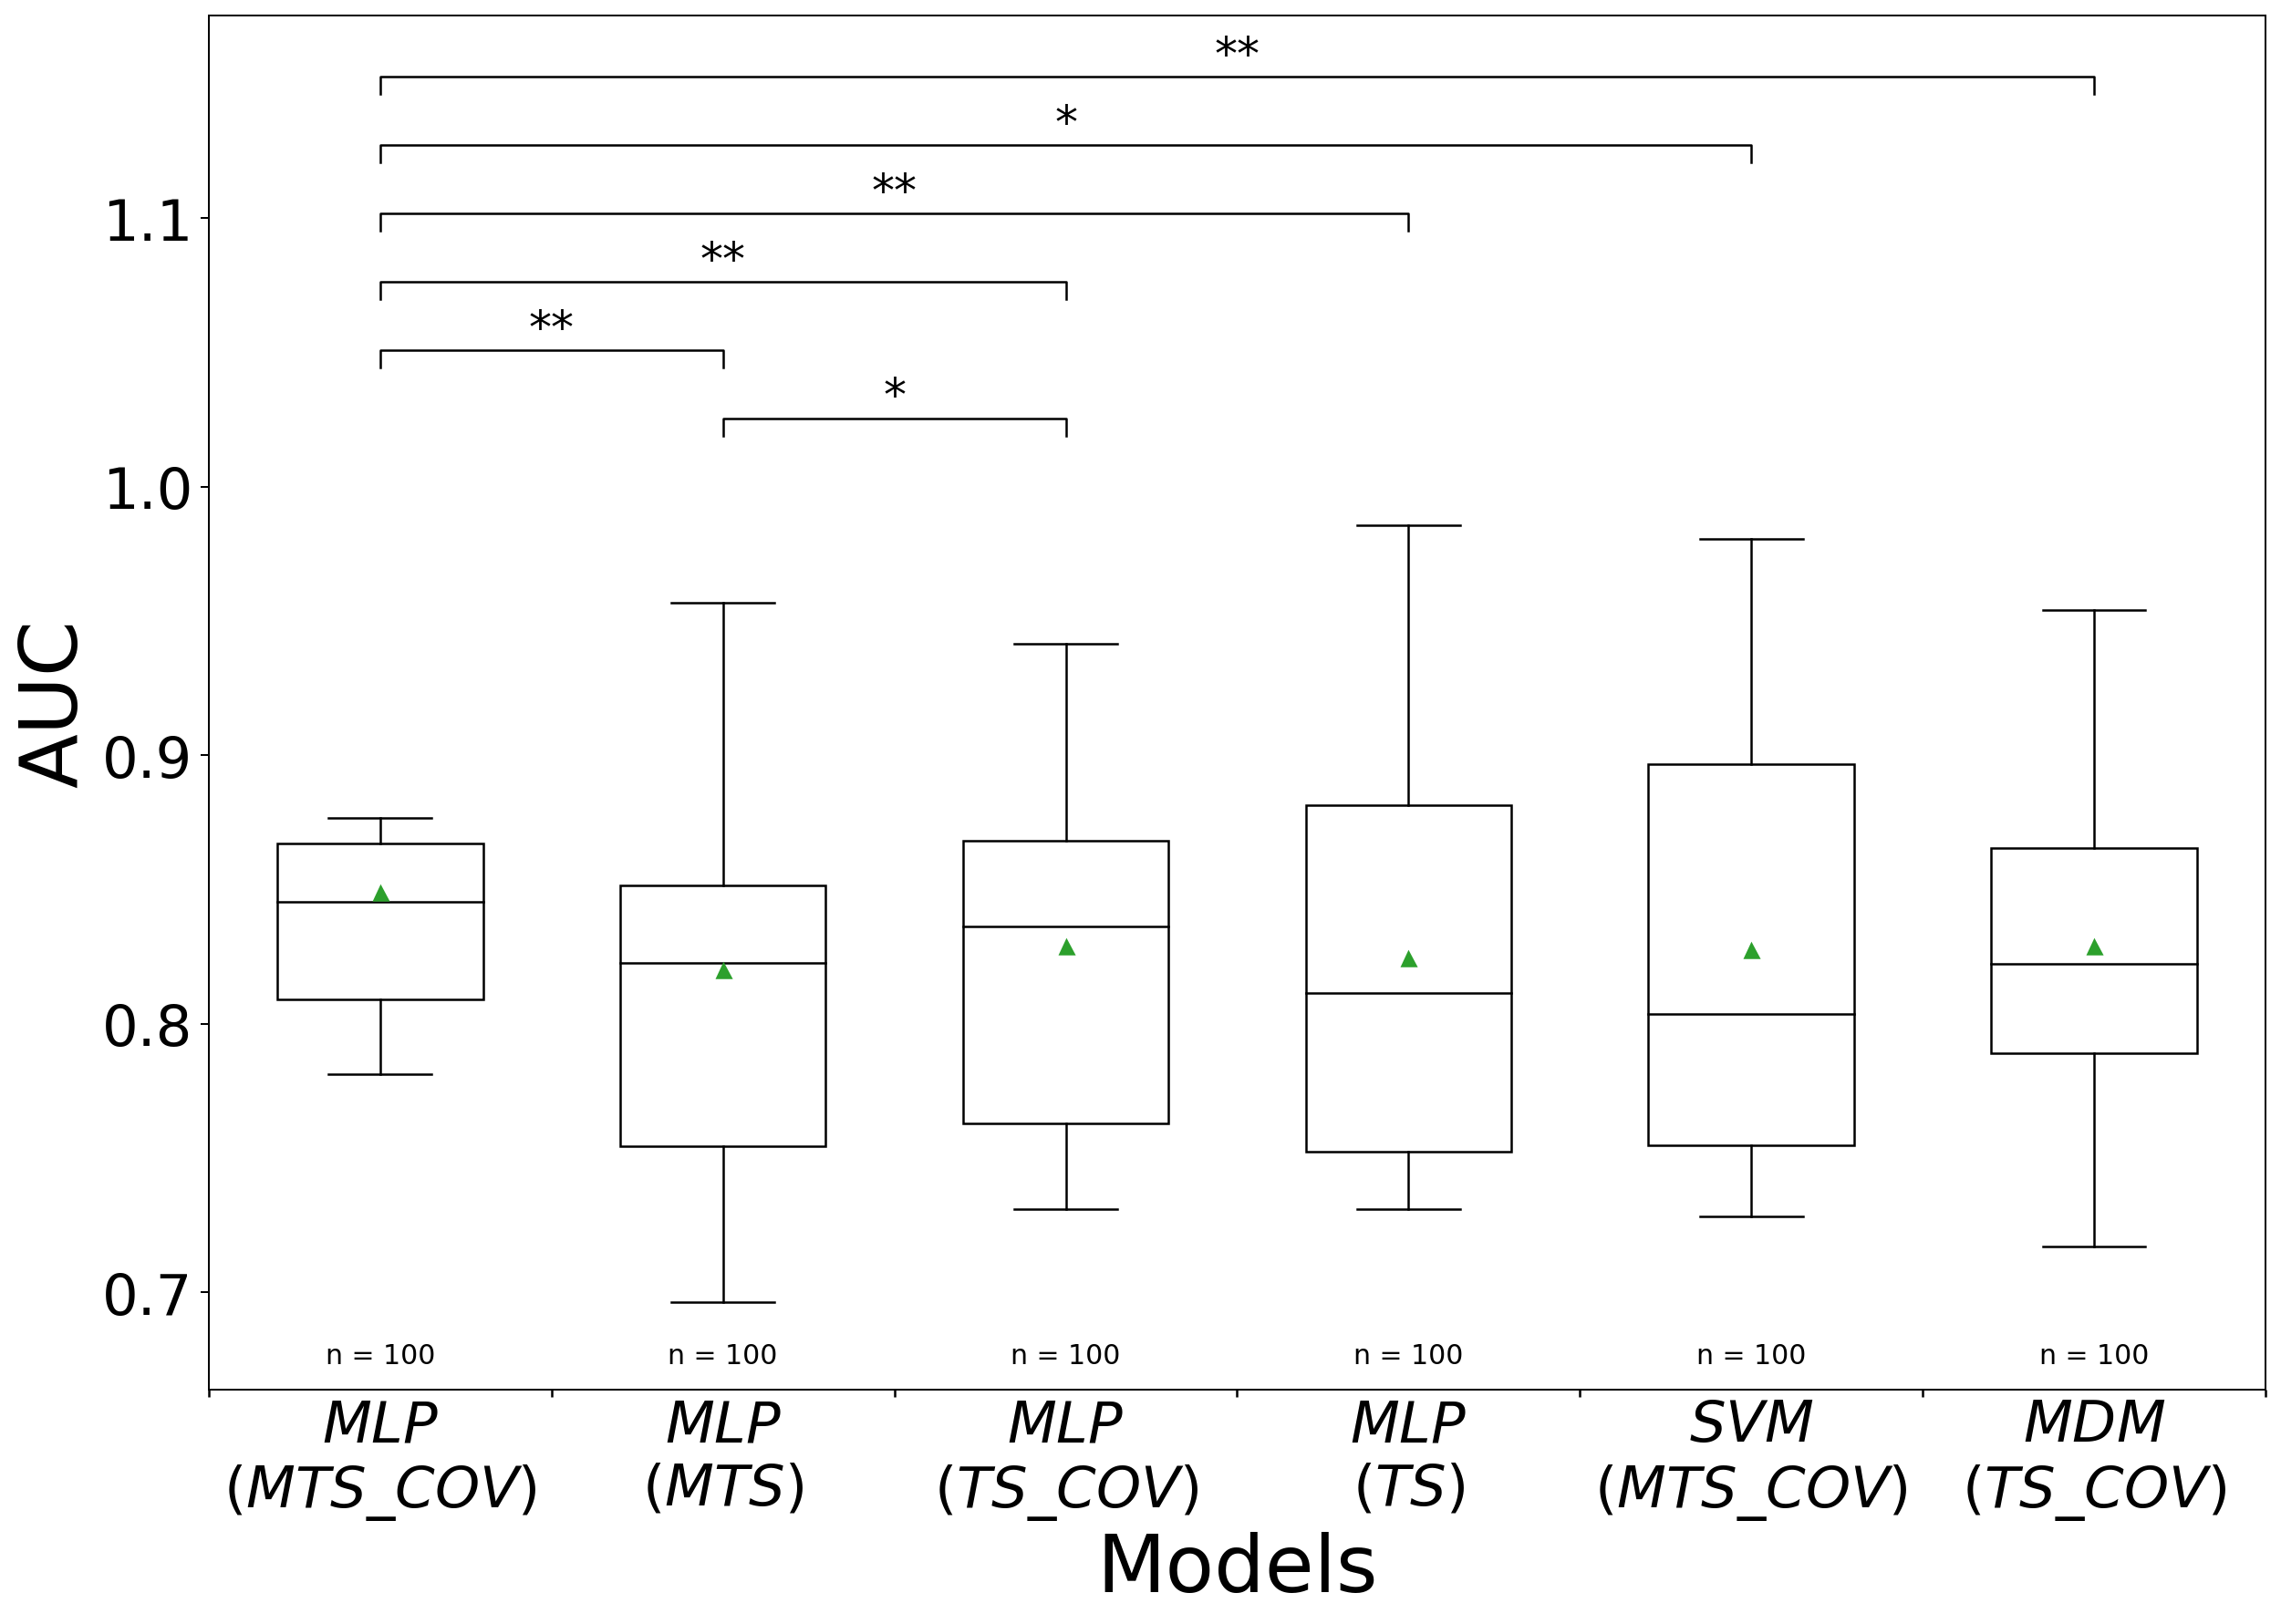

In [15]:
# Fig. 4: AUC scores for the best six approaches
# 0=mannwhitneyu, 1=ttest_rel, 2=corrected_ttest
statFunction = 2

title = 'AUC for 100 runs outcome prediction'
ylabel = 'AUC'
box_and_whisker(aucData, title, ylabel, xticklabels, statFunction)

### Average VCGs

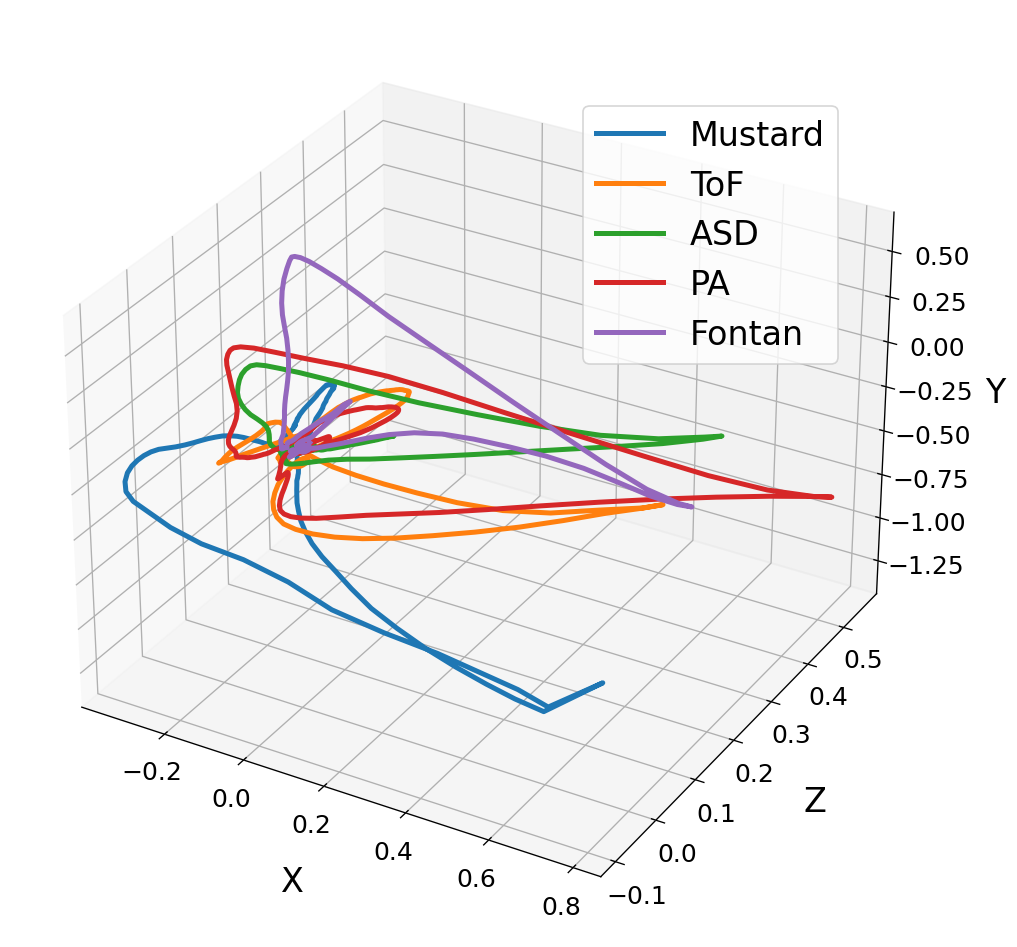

In [37]:
# Fig. 1: Average VCGs across anatomical defects in CHD
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

ax.plot3D(data_mustard[0], data_mustard[1], data_mustard[2], zdir='z', label='Mustard', color='#1f77b4', linewidth=3);
#ax.scatter3D(data_mustard[0], data_mustard[1], data_mustard[2], c=data_mustard[2], cmap='Greens', zdir='z');

ax.plot3D(data_tof[0], data_tof[1], data_tof[2], zdir='z', label='ToF', color='#ff7f0e', linewidth=3);
#ax.scatter3D(data_tof[0], data_tof[1], data_tof[2], c=data_tof[2], cmap='Greens', zdir='z');

ax.plot3D(data_atrspt[0], data_atrspt[1], data_atrspt[2], zdir='z', label='ASD', color='#2ca02c', linewidth=3);
#ax.scatter3D(data_atrspt[0], data_atrspt[1], data_atrspt[2], c=data_atrspt[2], cmap='Greens', zdir='z');

ax.plot3D(data_pulart[0], data_pulart[1], data_pulart[2], zdir='z', label='PA', color='#d62728', linewidth=3);
#ax.scatter3D(data_pulart[0], data_pulart[1], data_pulart[2], c=data_pulart[2], cmap='Greens', zdir='z');

ax.plot3D(data_fontan[0], data_fontan[1], data_fontan[2], zdir='z', label='Fontan', color='#9467bd', linewidth=3);
#ax.scatter3D(data_fontan[0], data_fontan[1], data_fontan[2], c=data_fontan[2], cmap='Greens', zdir='z');


ax.set_xlabel('X', fontsize=20, labelpad=18)
ax.set_ylabel('Z', fontsize=20, labelpad=18)
ax.set_zlabel('Y', fontsize=20, labelpad=20)

ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='z', labelsize=15, pad=10)


plt.legend(fontsize=20, loc="lower left", bbox_to_anchor=(0.6,0.6));
plt.tight_layout()
fig.canvas.draw()


bbox = Bbox([[-0.09,-0.095],[0.11,0.08]])
bbox = bbox.transformed(ax.transData).transformed(fig.dpi_scale_trans.inverted())
plt.show()
